**Problem:** Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

## Imports


In [158]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [159]:
# Load the datasets
df1 = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
df2 = pd.read_csv('takehome_users.csv', encoding='latin-1')

## *Prepare the usage summary table*

In [160]:
print('shape:', df1.shape)
df1.head()

shape: (207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [161]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [162]:
# Change the type of time stamp column
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])

In [163]:
# find the day difference between two logins for each user
df1['time_diff'] = df1['time_stamp'].groupby(df1['user_id']).diff().dt.days
df1.head()

,time_stamp,user_id,visited,time_diff
0,2014-04-22 03:53:30,1,1,NaN
1,2013-11-15 03:45:04,2,1,NaN
2,2013-11-29 03:45:04,2,1,14.0
3,2013-12-09 03:45:04,2,1,10.0
4,2013-12-25 03:45:04,2,1,16.0


In [164]:
# There is NaNs for each users for first login
# Replance NaNs with 0
df1['time_diff'].replace(np.nan, 0, inplace=True)

In [165]:
df1.head()

,time_stamp,user_id,visited,time_diff
0,2014-04-22 03:53:30,1,1,0.0
1,2013-11-15 03:45:04,2,1,0.0
2,2013-11-29 03:45:04,2,1,14.0
3,2013-12-09 03:45:04,2,1,10.0
4,2013-12-25 03:45:04,2,1,16.0


In [166]:
# Create a list from users who has logged into three separate days in at least one seven day period.
user_list = [] 
for user in df1.user_id.unique(): 
    df = df1[df1.user_id == user] # df for each user_id
    if len(df)<3: # Length of less than 3 means user logged less than 3 times
        continue
    for i in range(0, len(df)-2): 
        if df.time_diff.iloc[i]+df.time_diff.iloc[i+1]+df.time_diff.iloc[i+2] <=8:
            user_list.append(user)

In [167]:
# Set of user list. There are duplicates for ids.
user_list = sorted(list(set(user_list)))
# Check the first 10 user_ids
user_list[:10]

[2, 10, 20, 42, 43, 53, 63, 69, 74, 80]

In [168]:
# make an array for adopted user
adopt_status = np.ones(len(user_list))
adopt_status

array([1., 1., 1., ..., 1., 1., 1.])

In [169]:
# create a dict from two lists
dict_adop = {user_list[i]: adopt_status[i] for i in range(len(user_list))}   
# Convert dict to df
df = pd.DataFrame(list(dict_adop.items()), columns=['user_id', 'adopt_status'])
df.head()

,user_id,adopt_status
0,2,1.0
1,10,1.0
2,20,1.0
3,42,1.0
4,43,1.0


In [170]:
# Get total # visits and average time difference between logins
df1= df1.groupby('user_id').agg(Mean=('time_diff', np.mean),Sum=('visited', np.sum)).reset_index()

In [171]:
# Add adopt status to df1
df1 = df1.merge(df, how='left', on='user_id')

# There will some NANs for non-adopt users. replace them with zeros
df1['adopt_status'].replace(np.nan, 0, inplace=True)

In [172]:
print('The number of adopted users is', df1.adopt_status.sum())

The number of adopted users is 1476.0


## *Prepare the user table*

In [173]:
# Examine the df2 which is about 12,000 users who signed up for the product in the last two years.
print('shape:', df2.shape)
df2.head()

shape: (12000, 10)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [174]:
df2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [175]:
# Change the name of object_id column. user_id is more obvious
df2.rename(columns = {'object_id': 'user_id'}, inplace=True)

In [176]:
# Investigate NANs
df2.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [177]:
# Check whether someone with user_id=0
df2[df2['invited_by_user_id']==0]

# I can use 0 for the users who were not invoted by someone

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [178]:
# Replace NANs with 0 in df2
df2.replace(np.nan, 0, inplace=True)

In [179]:
# Change scientific notation to integer
df2['last_session_creation_time'] = df2['last_session_creation_time'].astype('int64')

In [180]:
df2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [181]:
from datetime import datetime

date_list= []
for i in df2['last_session_creation_time'].to_list():
    k = datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S')
    date_list.append(k)
    
# add list to 'last_session_creation_time' columns
df2['last_session_creation_time'] = date_list


# Note: 1970-01-01 00:00:00 means NANs

In [182]:
# Convert the type of time related columns
df2['creation_time']=pd.to_datetime(df2['creation_time'])

df2['last_session_creation_time'] = pd.to_datetime(df2['last_session_creation_time'])

**Merge two tables**

In [183]:
df = df2.merge(df1, how='left', on='user_id')

In [184]:
# Some of user_ids are not in usage table. That means they didn't use the product.
# Their adopt_status is 0

df['adopt_status'].replace(np.nan, 0, inplace=True)

In [185]:
# Change some column names
df.rename(columns={'opted_in_to_mailing_list':'mail', 'enabled_for_marketing_drip':'reg_mail'}, inplace=True)

In [186]:
df.rename(columns={'Sum':'total_visit', 'Mean':'ave_time_diff'}, inplace=True)

In [187]:
# the users -who have not logged into product- number of visit seems NANs
# replace with 0
df['total_visit'].replace(np.nan, 0, inplace=True)

**Creating new features**

In [188]:
# The time between creation_time and last login
#df[creat_last_diff] == 
df['create_last_diff'] = ((df['last_session_creation_time'] - df['creation_time']).dt.days)

# note: negative days means these users have never login a session. They just created an account. 

In [189]:
# The important thing is not to be invited by whom, but to creat the account without being invited or not.
# Create a new column which shows the user invited or not
df['invited'] = np.where(df['invited_by_user_id']>0, 1,0)

# 1 show invited by someone

In [190]:
# create a list of our conditions
conditions = [
    (df['create_last_diff'] < 0), # they have never login --> 0
    (df['create_last_diff'] == 0), # they have login only one time. At the same day with creatng account. --> 1
    (df['create_last_diff'] > 0), # they have login again after they created their account--> 2
        ]
# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column 
df['login_system'] = np.select(conditions, values)

In [191]:
# One-hot coding for CREATION_SOURCE

# One-hot encoding for feature selection
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['creation_source']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)

In [192]:
df.rename(columns ={0:'guest_invite', 1:'org_invite', 2:'personal_project', 3:'sign_up', 4:'sign_up_google'}, inplace=True)

In [193]:
# One-hot coding for LOGIN SYSTEM

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['login_system']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)

In [194]:
df.rename(columns ={0:'non_logged_user', 1:'one_logged_user', 2:'regular_user' }, inplace=True)

**Prepare data for EDA and Feature Selection**

In [195]:
#First take the copy of dataframe. Keep it in case we need.
df_final = df.copy()

In [196]:
# Set index as user_id. We won't use in feature selection
df = df.set_index('user_id')

In [197]:
# Drop useless attributes
df.drop(columns=['name', 'email', 'creation_source', 'creation_time','last_session_creation_time'], inplace=True)

In [198]:
# the users -who have not logged into product- create_last-diff seems <0
# and ave_time_diff is NAN
# time differencee<0 is impossible
# it's negative because these values are NaNs in table 2
# replace negatives with 0
temp = df.create_last_diff < 0
df.loc[temp, 'create_last_diff'] = 0
df.loc[temp, 'ave_time_diff'] = 0

In [199]:
print(len(df.invited_by_user_id.value_counts()))
# I want to drop invited_by_user_id. There are too much different ids. I am interested in invited or not invited
df.drop(columns=['invited_by_user_id'], inplace=True)

2565


In [200]:
print(len(df.org_id.value_counts()))
# I won't organization id columns for feature selection
df.drop(columns='org_id', inplace=True)

417


In [201]:
df.head()

,mail,reg_mail,ave_time_diff,total_visit,adopt_status,create_last_diff,invited,login_system,guest_invite,org_invite,personal_project,sign_up,sign_up_google,non_logged_user,one_logged_user,regular_user
user_id,,,,,,,,,,,,,,,,
1,1,0,0.000000,1.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,9.714286,14.0,1.0,136,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0.000000,1.0,0.0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0.000000,1.0,0.0,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0,0.000000,1.0,0.0,5,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**EDA**

In [202]:
# number of adopted users
print(df.adopt_status.value_counts())
print(round(df.adopt_status.value_counts(normalize=True)*100,2))

0.0    10524
1.0     1476
Name: adopt_status, dtype: int64
0.0    87.7
1.0    12.3
Name: adopt_status, dtype: float64


In [203]:
# Adoption status according to creation source
round(pd.crosstab(df_final.creation_source, df_final.adopt_status, normalize='columns')*100,2)

adopt_status,0.0,1.0
creation_source,,
GUEST_INVITE,17.36,22.76
ORG_INVITE,35.59,34.49
PERSONAL_PROJECTS,18.64,10.09
SIGNUP,17.23,18.56
SIGNUP_GOOGLE_AUTH,11.18,14.09


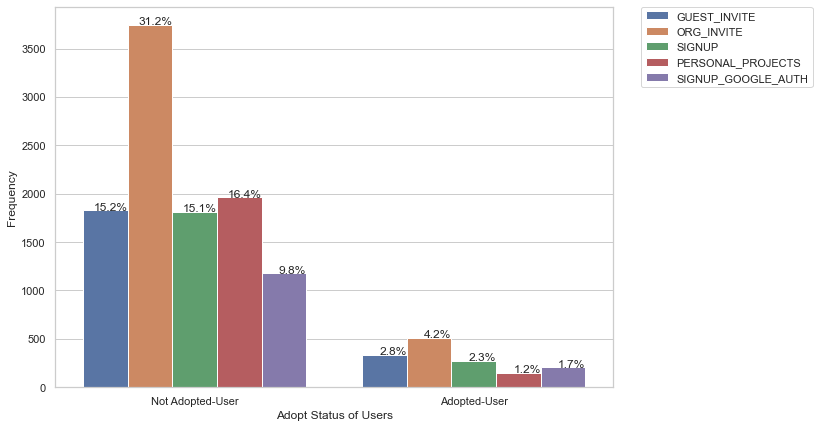

In [204]:
# Visualization of creation of sources
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="adopt_status", hue='creation_source', data=df_final)
ax.set(xlabel='Adopt Status of Users', ylabel='Frequency')
ax.set_xticklabels(['Not Adopted-User', 'Adopted-User'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()



In [205]:
# Adoption status according to mail preferences, invited by someone, 
for column in df[['mail','reg_mail','invited','login_system']]:
    columnSeriesObj = df[column]
    print(round(pd.crosstab(columnSeriesObj, df.adopt_status, normalize='columns')*100,2))

adopt_status    0.0    1.0
mail                      
0             75.17  74.19
1             24.83  25.81
adopt_status    0.0    1.0
reg_mail                  
0             85.07  85.03
1             14.93  14.97
adopt_status    0.0    1.0
invited                   
0             47.05  42.75
1             52.95  57.25
adopt_status    0.0    1.0
login_system              
0             30.19    0.0
1             28.76    0.0
2             41.05  100.0


In [206]:
# the average number of logins 
# The users who logged into product more than one
df[df['total_visit']>1].pivot_table(index='adopt_status', values=['total_visit'], aggfunc=np.mean)

,total_visit
adopt_status,
0.0,4.808453
1.0,133.018293


(array([9.978e+03, 3.180e+02, 1.360e+02, 4.900e+01, 2.400e+01, 4.000e+00,
        1.200e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

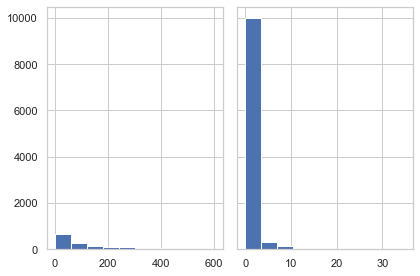

In [207]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(df[df.adopt_status==1]['total_visit'])
axs[1].hist(df[df.adopt_status==0]['total_visit'])

In [208]:
# the average time difference between creating account and last login
# The users who logged into product more than one
df[(df['create_last_diff']!=0)].pivot_table(index='adopt_status', values=['create_last_diff'], aggfunc=np.mean)

,create_last_diff
adopt_status,
0.0,12.676620
1.0,316.906504


In [209]:
# the average time difference between creating account and last login
# The users who logged into product more than one
df[df['total_visit']>1].pivot_table(index='adopt_status', values=['ave_time_diff'], aggfunc=np.mean)

,ave_time_diff
adopt_status,
0.0,8.676899
1.0,3.798614


In [210]:
df.head()

,mail,reg_mail,ave_time_diff,total_visit,adopt_status,create_last_diff,invited,login_system,guest_invite,org_invite,personal_project,sign_up,sign_up_google,non_logged_user,one_logged_user,regular_user
user_id,,,,,,,,,,,,,,,,
1,1,0,0.000000,1.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,9.714286,14.0,1.0,136,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0.000000,1.0,0.0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0.000000,1.0,0.0,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0,0.000000,1.0,0.0,5,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Feature Selection**

In [211]:
df.drop(columns=['login_system'], inplace=True)
# We already one hot encoded this column

In [212]:
# define features and target
X= df.drop('adopt_status', axis=1)
y= df['adopt_status']

In [213]:
print(X.shape)
print(y.shape)

(12000, 14)
(12000,)


In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [216]:
from sklearn.ensemble import RandomForestClassifier

#List of features
feat_labels = X.columns

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('mail', 0.0034570751430782047)
('reg_mail', 0.002686640233649807)
('ave_time_diff', 0.20039225576315148)
('total_visit', 0.40233150839018106)
('create_last_diff', 0.33951620359410645)
('invited', 0.0012914767034674863)
('guest_invite', 0.001671463050327985)
('org_invite', 0.0017841458468708347)
('personal_project', 0.0015482856766471148)
('sign_up', 0.0015730253580391858)
('sign_up_google', 0.0013521137394278764)
('non_logged_user', 0.007009412675342836)
('one_logged_user', 0.007057593091563199)
('regular_user', 0.028328800734146578)


In [250]:
list_of_factors = ['Mail', 'Regular Mail', 'Time between Logins', 'Number of Total Visit',
                  'Time Between Create and Last Login', 'Invited', 'Organization Guest',
                   'Organization Invited', 'Personal Project', ' Signed Up', 
                   'Signed Up -  Google', 'Never Logged', 
                   'One Time Logged', 'More than One Logged'] 

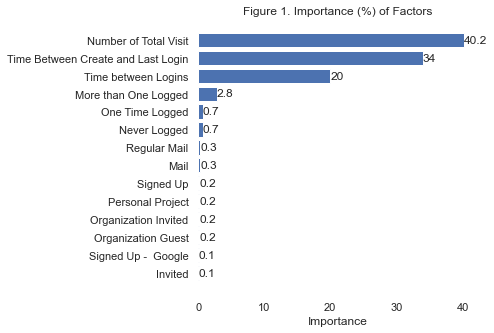

In [268]:
f_i = list(zip(feat_labels, np.round(clf.feature_importances_,3)*100))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(5,5))
bar = plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.yticks(X.columns,list_of_factors )
plt.xlabel('Importance')
plt.title('Figure 1. Importance (%) of Factors')
plt.bar_label(bar)
plt.grid(False)
plt.box(False)
plt.show()